<a href="https://colab.research.google.com/github/yello-ow/AIB_Project/blob/main/AI_05_%EA%B9%80%EC%98%88%EB%A6%B0_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section1 Project**
#### 문제 : 다음 분기에 어떤 게임을 설계해야 할까


##### <필수과제> 
##### 1. 지역에 따라서 선호하는 게임 장르가 다를까
##### 2. 연도별 게임의 트렌드가 있을까
##### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### **데이터 전처리**

In [ ]:
#데이터 불러오기 

import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(url)
df = df.iloc[:, 1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#데이터 타입 확인 
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
#결측치 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#결측치 제거 및 확인 
df = df.dropna()
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
#[Year] : 4글자 형식으로 동일하게 맞추기 및 글자로 형식 변경

date = df['Year']

def year(date) :
    if  0 <= date <= 20 : 
        return 2000+date

    elif 21 <= date <= 99 :
        return 1900+date
    
    elif 1900<= date < 3000 : 
        return date

df['Year'] = df['Year'].apply(year)
df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].astype(str)

In [ ]:
#출고량 M단위로 단일화 

def sale(amount):
  if type(amount) == str:

    if 'K' in amount:
      amount = pd.to_numeric(amount.replace('K',''))
      amount = amount*0.001

    elif 'M' in amount:
      amount = pd.to_numeric(amount.replace('M',''))

  return pd.to_numeric(amount)

df['NA_Sales'] = df['NA_Sales'].apply(sale)
df['EU_Sales'] = df['EU_Sales'].apply(sale)
df['JP_Sales'] = df['JP_Sales'].apply(sale)
df['Other_Sales'] = df['Other_Sales'].apply(sale)

### **지역별 선호도 조사**




#### 1. 지역별 Genre 선호도 조사 (필수과제)

In [ ]:
#지역별 Genre 출고량 조사

genre = df.groupby('Genre').sum()
genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


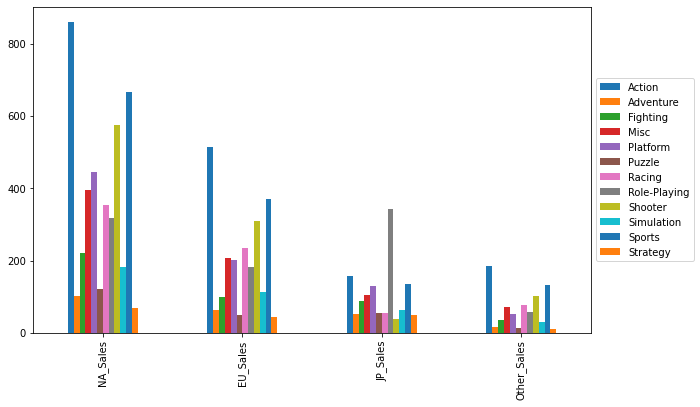

In [ ]:
#지역별 Genre 출고량 조사 결과 시각화 

genre = genre.T
import matplotlib.pyplot as plt

genre.plot(kind='bar',figsize=(10,6));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

- 북미 지역 : **Action > Sports > Shooter** > Platform > Misc
- 유럽 지역 :**Action > Sports > Shooter** > Racing > Misc
- 일본 지역 : Role-Playing > **Action** > Platform = Sports > Misc
- 기타 지역 : **Action > Sports > Shooter** > Racing = Misc

결론 : 일본을 제외하고 지역에 따라서 선호하는 게임장르가 동일하다. 

#### 2. 지역별 Platform 선호도 조사  

In [ ]:
# 지역별 Platform 출고량 조사 

platform = df.groupby('Platform').sum()
platform

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,80.32,4.83,0.00,0.83
3DO,0.00,0.00,0.10,0.00
3DS,72.86,54.24,92.96,11.76
DC,5.43,1.69,8.56,0.27
DS,387.93,194.05,174.97,60.24
GB,113.64,47.51,85.12,8.16
GBA,178.26,72.43,46.56,7.51
GC,131.74,38.27,20.90,5.11
GEN,19.27,5.52,2.67,0.89


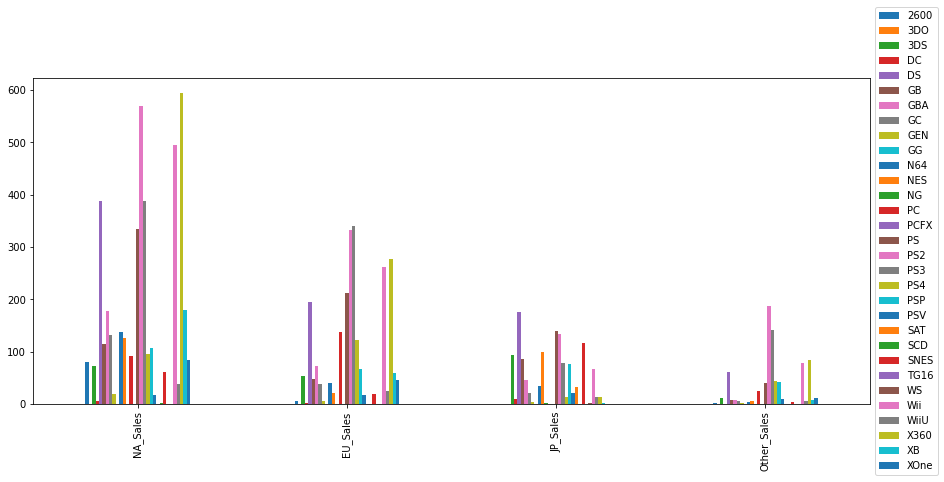

In [ ]:
#지역별 Platform 출고량 조사 결과 시각화 

platform = platform.T

platform.plot(kind='bar',figsize=(15,6));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

- 북미 지역 : X360 > PS2 > Wii > PS3 = DS
- 유럽 지역 : PS3 > PS2 > X360 > Wii > PS 
- 일본 지역 : DS > PS > PS2 > SNES > NES
- 기타 지역 : PS2 > PS3 > X360 > Wii > DS

결론 : 지역별로 Platform 선호도가 다르다. 

### **연도별 게임의 트렌드 조사** (필수과제)

#### 1. 연도별 장르 선호도 조사

In [ ]:
#세계 게임 출고량 조사

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [ ]:
#연도별 세계 게임 출고량 조사 

year_sales = df.groupby(['Year','Genre']).sum()
year_sales = year_sales[['Total_Sales']]
year_sales

Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.70
     Shooter              7.07
1981 Action              14.79
...                        ...
2016 Sports              14.63
     Strategy             0.52
2017 Action               0.01
     Role-Playing         0.04
2020 Simulation           0.29

[388 rows x 1 columns]

연도별 게임 세계 출고량 시각화 방법 

- year_sales를 pivot_table로 바꾸고 stacked bar 그리기 
- year_slaes를 unstack하고 stacked bar 그리기 
- year_sales를 pivot_table로 바꾸고 T한 후 Heatmap 그리기

(*pivot_table과 unstack의 결과 동일, 그래프 결과도 동일)

In [ ]:
#1-1. pivot_table로 바꾸기 

year_sales_p = year_sales.reset_index() # pivot_table로 바꾸려면 reset_index필요 
pivot_df = year_sales_p.pivot(index='Year', columns='Genre')

#1-2. Stacked bar로 시각화 
#pivot_df.plot.bar(stacked=True, legend='reverse', figsize=(15,8)); #legend='reverse': legend의 순서를 Bar segment와 일치

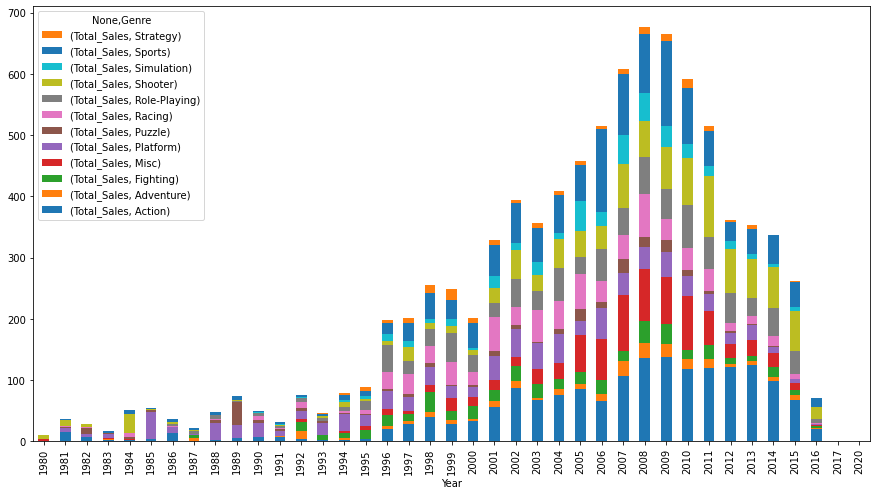

In [ ]:
#2. year_slaes를 unstack하고 stacked bar 그리기

%matplotlib inline
year_sales.unstack().plot(kind='bar', stacked=True, legend='reverse', figsize=(15,8)); #unstack() : pivot_table과 동일한 결과 

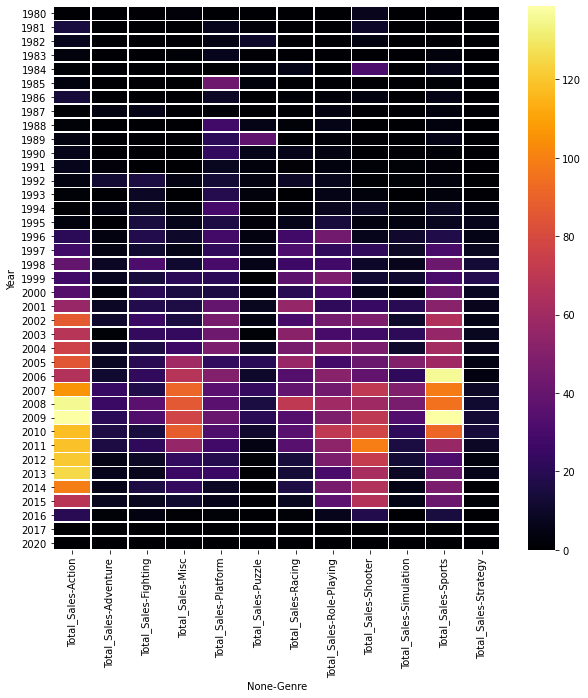

In [ ]:
# 3. year_sales를 pivot_table로 바꾸고 Heatmap 그리기
pivot_df = pivot_df.fillna(0) # 결측치를 0으로 대체

import seaborn as sns
plt.figure(figsize=(10,10)) #heatmap 사이즈 지정
sns.heatmap(pivot_df, cmap = 'inferno' ,linewidths=0.5) #pivot_df 데이터로 heatmap 그리기 
plt.show() 

#### 2. 연도별 출시 장르 조사  

In [ ]:
year_counts = df.value_counts(['Year','Genre'])
year_counts

year_df = pd.DataFrame(year_counts)
year_df = year_df.reset_index()
year_df = year_df.sort_values(by=['Year'], axis=0)
year_df

,Year,Genre,0
387,1980,Action,1
360,1980,Fighting,1
351,1980,Shooter,2
305,1980,Misc,4
342,1981,Puzzle,2
...,...,...,...
235,2016,Fighting,14
32,2016,Action,118
365,2017,Action,1
344,2017,Role-Playing,2


In [ ]:
pivot_year = year_df.pivot(index='Year', columns='Genre')
pivot_year = pivot_year.fillna(0)

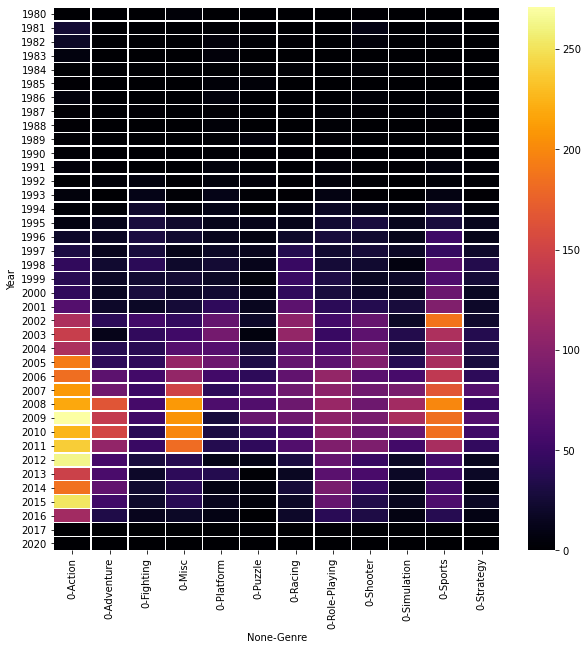

In [ ]:
plt.figure(figsize=(10,10)) #heatmap 사이즈 지정
sns.heatmap(pivot_year, cmap = 'inferno' ,linewidths=0.5) #pivot_t 데이터로 heatmap 그리기 
plt.show() 

#### 3. 연도별 출시 플랫폼 조사 

In [ ]:
platform_counts = df.value_counts(['Year','Platform'])
platform_df = pd.DataFrame(platform_counts)
platform_df = platform_df.reset_index()
platform_df = platform_df.sort_values(by=['Year'], axis=0)
platform_df

,Year,Platform,0
166,1980,2600,8
101,1981,2600,46
114,1982,2600,36
182,1983,NES,6
153,1983,2600,11
...,...,...,...
121,2016,PS3,32
156,2016,WiiU,10
205,2017,PSV,2
216,2017,PS4,1


In [ ]:
pivot_platform = platform_df.pivot(index='Year', columns='Platform')
pivot_platform = pivot_platform.fillna(0)

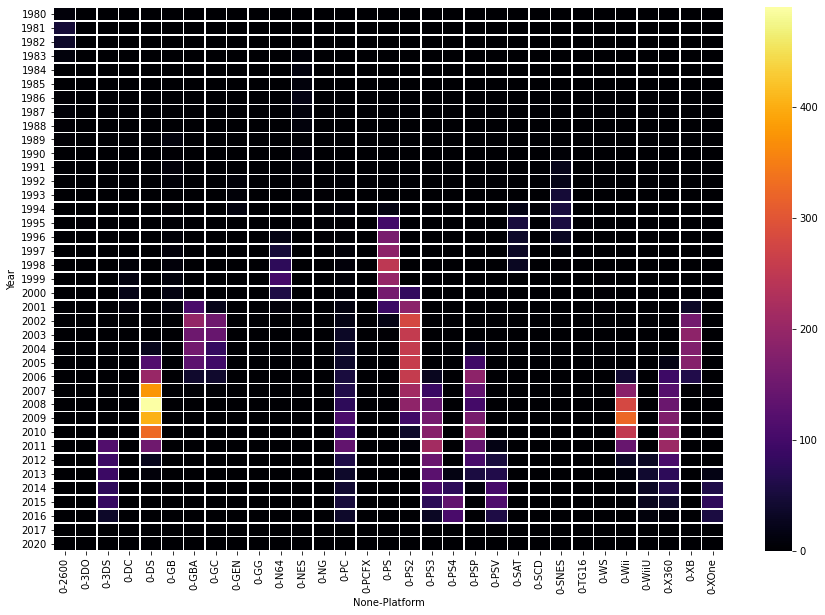

In [ ]:
plt.figure(figsize=(15,10)) #heatmap 사이즈 지정
sns.heatmap(pivot_platform, cmap = 'inferno' ,linewidths=0.5) #pivot_t 데이터로 heatmap 그리기 
plt.show() 

### **전체 출고량 기준 선호도 조사**

#### 1. 전체 출고량 Top50 Game 조사 (필수과제)

In [ ]:
# 전체 출고량이 높은 Game 50개 조사 

game_top = df.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(50)
game_top = game_top[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']]

##### 1-1. 전체 출고량 Top50 Game의 Publisher 조사

In [ ]:
#전체 출고량이 높은 Game 50개의 Publisher 조사

t_publisher = game_top.value_counts(['Publisher'])
t_pb_df = pd.DataFrame(t_publisher, columns = ['Counts'])
t_pb_df = t_pb_df.reset_index()
t_pb_df

,Publisher,Counts
0,Nintendo,32
1,Activision,8
2,Take-Two Interactive,6
3,Sony Computer Entertainment,2
4,Microsoft Game Studios,2


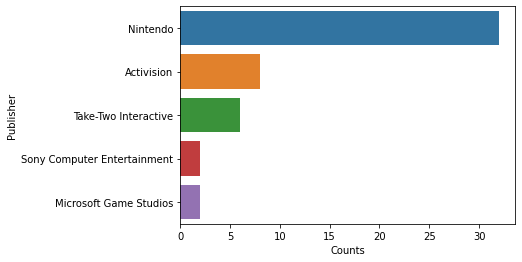

In [ ]:
# 전체 출고량이 높은 Game 50개의 Publisher 조사 결과 시각화
sns.barplot(x='Counts', y='Publisher', data=t_pb_df);

##### 1-2. 전체 출고량 Top50 Game의 Platform 조사

In [ ]:
# 전체 출고량이 높은 Game 50개의 Platform 조사 
t_platform = game_top.value_counts(['Platform'])

t_p_df = pd.DataFrame(t_platform, columns = ['Counts'])
t_p_df = t_p_df.reset_index()

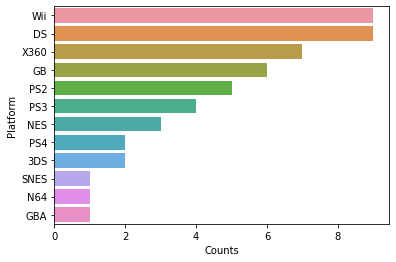

In [ ]:
# 전체 출고량이 높은 Game 50개의 Platform 조사 결과 시각화
sns.barplot(x='Counts',y='Platform', data=t_p_df);

##### 1-3. 전체 출고량 Top50 Game의 Genre 조사

In [ ]:
# 전체 출고량이 높은 Game 50개의 Genre 조사 
t_genre = game_top.value_counts(['Genre'])

t_g_df = pd.DataFrame(t_genre, columns = ['Counts'])
t_g_df = t_g_df.reset_index()

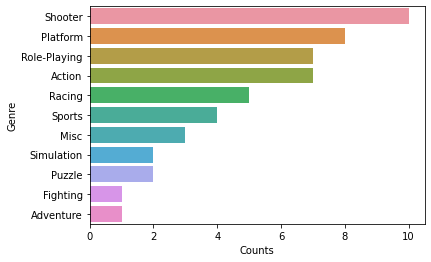

In [ ]:
# 전체 출고량이 높은 Game 50개의 Genre 조사 결과 시각화
sns.barplot(x='Counts', y='Genre', data=t_g_df);

#### 2. 전체 출고량 Top5 Platform



In [ ]:
# 전체 출고량 Top5 Platform 조사

platform_top5 = df.groupby('Platform').sum()
platform_top5 = platform_top5.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(5)
platform_top5 = platform_top5.reset_index()

platform_top5

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,PS2,568.54,332.03,134.10,187.77,1222.44
1,X360,593.78,277.90,12.29,84.62,968.59
2,PS3,388.00,339.71,78.56,140.47,946.74
3,Wii,495.10,260.78,65.79,78.48,900.15
4,DS,387.93,194.05,174.97,60.24,817.19


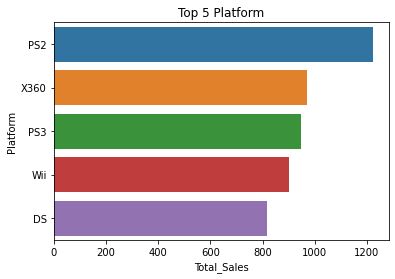

In [ ]:
# 전체 출고량 Top5 Platform 조사 결과 시각화 

sns.barplot(x='Total_Sales', y='Platform', data=platform_top5).set_title('Top 5 Platform');

전체 출고량 Top5 **Platform** :

PS2 > X360 > PS3 > Wii > DS 

#### 3. 전체 출고량 Top5 Genre

In [ ]:
# 전체 출고량 Top5 Genre 조사

genre_top5 = df.groupby('Genre').sum()
genre_top5 = genre_top5.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(5)
genre_top5 = genre_top5.reset_index()

genre_top5

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
1,Sports,667.26,370.97,134.76,132.35,1305.34
2,Shooter,574.48,310.23,38.18,101.86,1024.75
3,Role-Playing,318.76,183.09,342.93,56.73,901.51
4,Platform,445.38,200.63,130.53,51.45,827.99


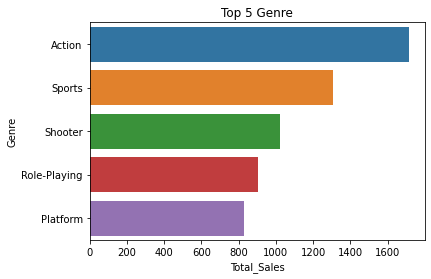

In [ ]:
# 전체 출고량 Top5 Genre 조사 결과 시각화 

sns.barplot(x='Total_Sales', y='Genre', data=genre_top5).set_title('Top 5 Genre');

#### 4. 전체 출고량 Top5 Publisher 조사

In [ ]:
# 전체 출고량 top5 Publisher 조사 
publisher_top5 = df.groupby('Publisher').sum()
publisher_top5 = publisher_top5.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(5)
publisher_top5 = publisher_top5.reset_index()

publisher_top5

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Nintendo,808.14,410.34,447.43,93.67,1759.58
1,Electronic Arts,579.90,366.11,13.98,127.19,1087.18
2,Activision,425.10,213.17,6.54,74.55,719.36
3,Sony Computer Entertainment,263.70,186.74,73.72,79.42,603.58
4,Ubisoft,252.26,162.99,7.33,50.12,472.70


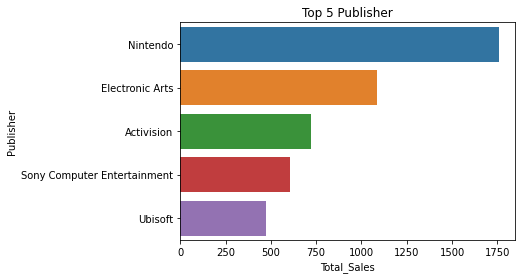

In [ ]:
# 전체 출고량 top5 Publisher 조사 결과 시각화 

sns.barplot(x='Total_Sales', y='Publisher', data=publisher_top5).set_title('Top 5 Publisher');

### **최근 10년간의 전체 출고량 기준 선호도 조사** 

In [ ]:
# 10년간의 데이터 추출 

df['Year'] = df['Year'].astype(int)
filter = df['Year'] > 2010 #데이터 기준 최근 10년 : 2011~2020년 
df['Year'] = df['Year'].astype(str)

df10 = df[filter]
df10.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01


#### 1. 최근 10년간 출시된 게임 중 출고량 top50 조사 

In [ ]:
# 최근 10년간 출시된 게임 중 출고량 top 50 조사 
game10_top = df10.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(50)
game10_top = game10_top[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']]

##### 1-1. 최근 10년간 출시된 게임 중 출고량 top 50개의 Publisher 조사

In [ ]:
#최근 10년간 출시된 게임 중 출고량 top 50개의 Publisher 조사

t_publisher10 = game10_top.value_counts(['Publisher'])
t_pb_df10 = pd.DataFrame(t_publisher10, columns = ['Counts'])
t_pb_df10 = t_pb_df10.reset_index()
t_pb_df10

,Publisher,Counts
0,Activision,12
1,Nintendo,11
2,Electronic Arts,9
3,Ubisoft,4
4,Take-Two Interactive,4
5,Microsoft Game Studios,3
6,Bethesda Softworks,3
7,Sony Computer Entertainment,2
8,Warner Bros. Interactive Entertainment,1
9,Sony Computer Entertainment Europe,1


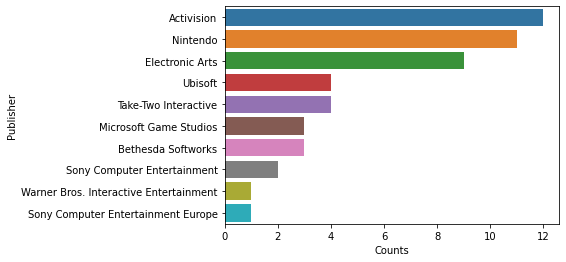

In [ ]:
sns.barplot(x='Counts', y='Publisher', data=t_pb_df10);

##### 1-2. 최근 10년간 출시된 게임 중 출고량 top 50개의 Platform 조사

In [ ]:
#최근 10년간 출시된 게임 중 출고량 top 50개의 Platform 조사

t_platform10 = game10_top.value_counts(['Platform'])
t_p_df10 = pd.DataFrame(t_platform10, columns = ['Counts'])
t_p_df10 = t_p_df10.reset_index()
t_p_df10

,Platform,Counts
0,PS3,14
1,X360,11
2,PS4,8
3,3DS,7
4,XOne,3
5,WiiU,3
6,Wii,2
7,PC,1
8,DS,1


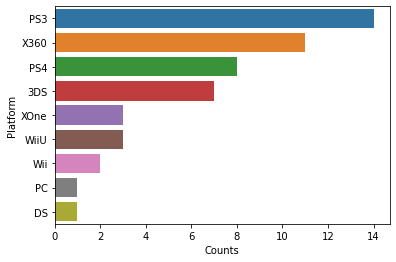

In [ ]:
sns.barplot(x='Counts', y='Platform', data=t_p_df10);

##### 1-3. 최근 10년간 출시된 게임 중 출고량 top 50개의 Genre 조사

In [ ]:
#최근 10년간 출시된 게임 중 출고량 top 50개의 Genre 조사

t_genre10 = game10_top.value_counts(['Genre'])
t_g_df10 = pd.DataFrame(t_genre10, columns = ['Counts'])
t_g_df10 = t_g_df10.reset_index()
t_g_df10

,Genre,Counts
0,Shooter,16
1,Action,11
2,Role-Playing,6
3,Sports,4
4,Misc,4
5,Platform,3
6,Simulation,2
7,Racing,2
8,Fighting,2


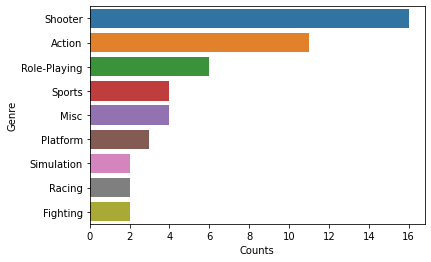

In [ ]:
sns.barplot(x='Counts', y='Genre', data=t_g_df10);

#### 2. 최근 10년간 전체 출고량 Top 5 Platform

In [ ]:
# 최근 10년간 전체 출고량 Top5 Platform 조사 

platform10_top5 = df10.groupby('Platform').sum()
platform10_top5 = platform10_top5.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(5)
platform10_top5 = platform10_top5.reset_index()

platform10_top5

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,PS3,166.84,171.60,49.16,69.21,456.81
1,X360,225.32,123.72,3.34,32.81,385.19
2,PS4,95.80,122.94,14.04,43.00,275.78
3,3DS,72.86,54.24,92.96,11.76,231.82
4,XOne,83.19,45.63,0.34,11.92,141.08


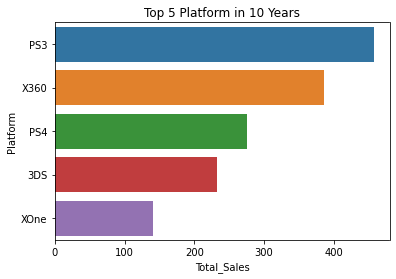

In [ ]:
# 최근 10년간 전체 출고량 Top5 Platform 조사 결과 시각화 

sns.barplot(x='Total_Sales', y='Platform', data=platform10_top5).set_title('Top 5 Platform in 10 Years');

#### 3. 최근 10년간 전체 출고량 top 5 Genre

In [ ]:
# 최근 10년간 전체 출고량 Top5 Genre 조사

genre10_top5 = df10.groupby('Genre').sum()
genre10_top5 = genre10_top5.sort_values(by=['Total_Sales'], axis=0, ascending=False).head(5)
genre10_top5 = genre10_top5.reset_index()

genre10_top5

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,226.08,199.24,61.80,64.98,552.10
1,Shooter,184.53,142.54,11.42,46.71,385.20
2,Sports,105.88,86.60,10.92,28.86,232.26
3,Role-Playing,73.85,56.00,72.43,18.45,220.73
4,Misc,70.05,40.84,17.25,12.76,140.90


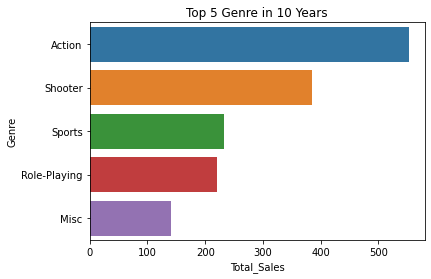

In [ ]:
# 최근 10년간 전체 출고량 Top5 Genre 조사 결과 시각화 

sns.barplot(x='Total_Sales', y='Genre', data=genre10_top5).set_title('Top 5 Genre in 10 Years');

### **최근 10년간의 지역별 출고량 기준 선호도 조사**  

#### 1. 최근 10년간 지역별 Platform 출고량

In [ ]:
# 최근 10년간 지역별 Platform 출고량 조사 

platform10_local = df10.groupby('Platform').sum()
platform10_local = platform10_local.iloc[:, 0:4]
platform10_local

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,72.86,54.24,92.96,11.76
DS,20.48,10.27,7.99,2.84
PC,28.84,53.95,0.00,12.47
PS2,0.13,0.13,0.09,0.10
PS3,166.84,171.60,49.16,69.21
PS4,95.80,122.94,14.04,43.00
PSP,2.18,1.90,23.99,1.07
PSV,16.07,16.27,20.81,8.41
Wii,51.24,31.60,8.97,8.36


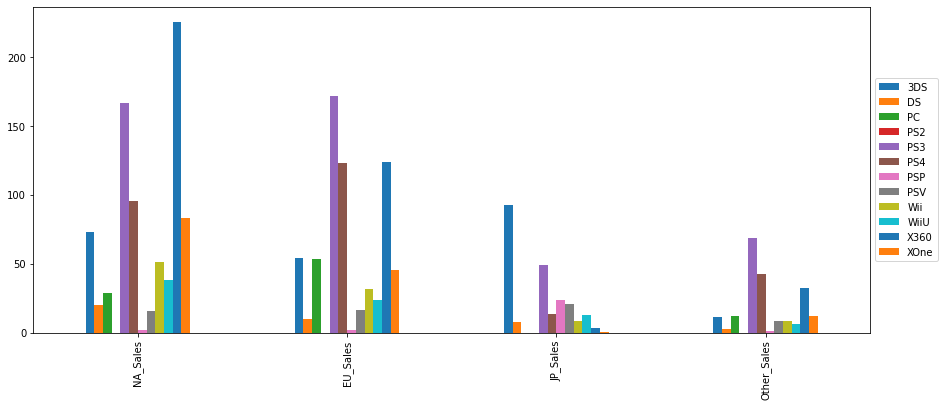

In [ ]:
# 최근 10년간 지역별 Platform 출고량 조사 결과 시각화

platform10_local = platform10_local.T
platform10_local.plot(kind='bar',figsize=(15,6));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

- 북미 지역 : **X360 > PS3 > PS4** > XOne > 3DS
- 유럽 지역 : **PS3 > X360 > PS4** > 3DS > PC 
- 일본 지역 : 3DS > **PS3** > PSP > PSV > WiiU
- 기타 지역 : **PS3 > PS4 > X360** > XOne > PC

***결론 : 일본 지역 제외 북미, 유럽, 기타 지역에서 최근 10년간 선호하는 Platform 1~3순위에 포함된 Platform 동일***

#### 2. 최근 10년간 지역별 Genre 출고량

In [ ]:
# 최근 10년간 지역별 Genre 출고량 조사 

genre10_local = df10.groupby('Genre').sum()
genre10_local = genre10_local.iloc[:, 0:4]
genre10_local

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,226.08,199.24,61.80,64.98
Adventure,14.34,13.83,11.72,4.39
Fighting,31.10,16.55,12.23,6.77
Misc,70.05,40.84,17.25,12.76
Platform,38.31,30.12,12.07,8.25
Puzzle,2.84,3.57,2.91,0.71
Racing,31.36,40.99,5.61,10.75
Role-Playing,73.85,56.00,72.43,18.45
Shooter,184.53,142.54,11.42,46.71


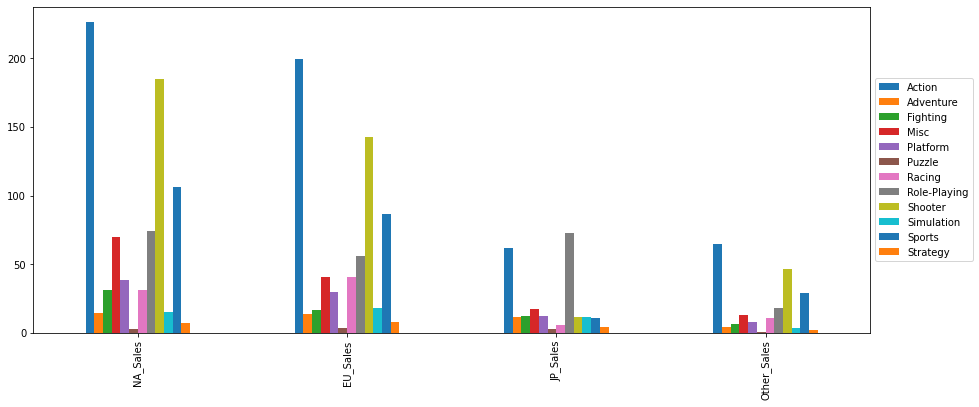

In [ ]:
# 최근 10년간 지역별 Genre 출고량 조사 결과 시각화

genre10_local = genre10_local.T
genre10_local.plot(kind='bar',figsize=(15,6));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

- 북미 지역 : **Action > Shooter > Sports > Role-Playing > Misc**
- 유럽 지역 : **Action > Shooter > Sports > Role-Playing > Misc**
- 일본 지역 : Role-Playing > Action > Misc > Platform = Fighting
- 기타 지역 : **Action > Shooter > Sports > Role-Playing > Misc**

***결론 : 일본 지역 제외 북미, 유럽, 기타 지역에서는 최근 10년간의 선호 장르 1~5순위 모두 동일***

### **지역별 시장 점유율** 

In [ ]:
# 최근 10년간의 지역별 시장 점유율 조사 

np_all = df10['NA_Sales'].sum()
eu_all = df10['EU_Sales'].sum()
jp_all = df10['JP_Sales'].sum()
ot_all = df10['Other_Sales'].sum()
total_all = df10['Total_Sales'].sum()

np_p = (np_all/total_all)*100
eu_p = (eu_all/total_all)*100
jp_p = (jp_all/total_all)*100
ot_p = (ot_all/total_all)*100

print('북미 지역 시장 점유율 : ', round(np_p,2) )
print('유럽 지역 시장 점유율 : ', round(eu_p,2) )
print('일본 지역 시장 점유율 : ', round(jp_p,2) )
print('기타 지역 시장 점유율 : ', round(ot_p,2) )
print('합계 : ', np_p+eu_p+jp_p+ot_p )

북미 지역 시장 점유율 :  42.16
유럽 지역 시장 점유율 :  34.54
일본 지역 시장 점유율 :  12.34
기타 지역 시장 점유율 :  10.96
합계 :  100.0


최근 10년간 지역별 시장 점유율 :

북미 (42.16%)  >  유럽 (34.54%)  >  일본 (12.34%)  >  기타 지역 (10.96%)